# Ultimate Takehome Challenge

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [649]:
import warnings
warnings.filterwarnings('ignore')

# Part 1 - Exploratory Data Analysis 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

Load logins data into pandas dataframe

In [2]:
# load json 'login-time' file into dataframe

logins_df = pd.read_json("logins.json")

In [3]:
# make sure the datatype is in 'datetime' format 

logins_df.dtypes

login_time    datetime64[ns]
dtype: object

In order to easily aggregate the login times I will index the dataframe by the time stamp.

In [4]:
# set the login_time column as the new index 

logins_df.set_index('login_time', inplace=True)

In [5]:
# create new column that will count the time-stamps that will be grouped by 15 min intervals 

logins_df['login_count'] = 1

In [169]:
# each time-stamp should have a value of '1'

logins_df

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [181]:
# use the 'resample' method along with 'sum' to aggreagte the time-stamps by 15min intervals 

logins_15mins_df = logins_df.resample('15T').sum()

In [182]:
logins_15mins_df

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [183]:
# make the login-times a column and reset the index 

logins_15mins_df.index.name = 'time_window'
logins_15mins_df.reset_index(inplace=True)

In [184]:
logins_15mins_df

,time_window,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


In [193]:
# extract the day of the week and hour from the datetime objects in 'time window' column

logins_15mins_df['day'] = logins_15mins_df.time_window.dt.day_name()
logins_15mins_df['hour'] = logins_15mins_df.time_window.dt.hour


In [220]:
#examine dataframe

logins_15mins_df

,time_window,login_count,day,hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21
...,...,...,...,...
9783,1970-04-13 17:45:00,5,Monday,17
9784,1970-04-13 18:00:00,5,Monday,18
9785,1970-04-13 18:15:00,2,Monday,18
9786,1970-04-13 18:30:00,7,Monday,18


Being that this dataset only spans 3.5 months, I will define 'seasonality' as hourly and daily cycles. Now I am going to aggregate the day and hour columns, to get login counts for each. 15 minute intervals seems a bit granular to be relevant.

In [231]:
# aggregate by day of week 
day_counts = logins_15mins_df.groupby('day').sum()

# drop 'hour' column
day_counts.drop('hour', axis=1, inplace=True)

#sort values from greatest to least
day_counts.sort_values('login_count', ascending=False)

,login_count
day,
Saturday,19377
Sunday,18167
Friday,15208
Thursday,11960
Wednesday,10339
Tuesday,9268
Monday,8823


We can see that the login count increses almost perfectly with the progression of the week, starting on Monday with the lowest count and peaking on Saturday with the highest count. 

In [229]:
# aggregate by hour of day
hour_counts = logins_15mins_df.groupby('hour').sum()

# sort values from greatest to least
hour_counts.sort_values('login_count', ascending=False)


,login_count
hour,
22,6607
1,6317
23,6058
0,5993
2,5800
11,5799
21,5623
4,5034
12,4964


We can see that the most common hours of the day to login in are 10pm, 1am, 11pm, Midnight, and 2am. This makes sense as people usually need a ride when they go out partying/drinking on the weekend. The least common hours are from 5-9am and around 4-6 pm. This suggests that people don't use this app much for commuting. 

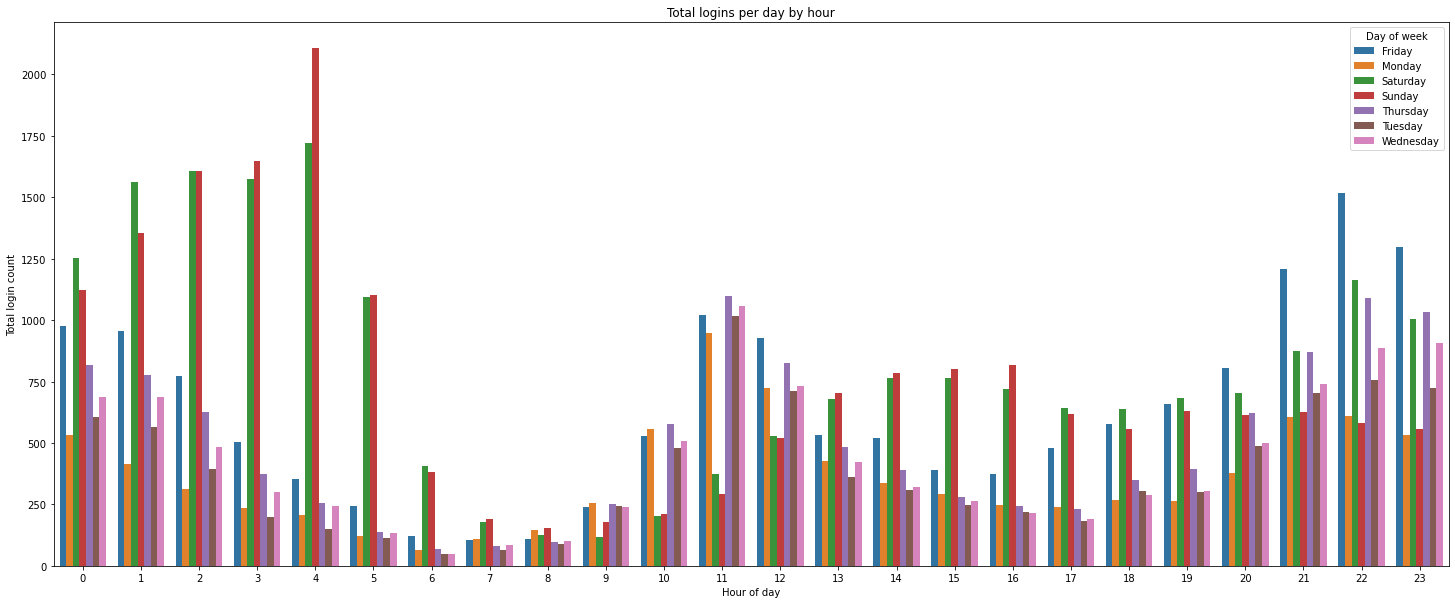

In [252]:
hour_day_df = logins_15mins_df.groupby(['hour', 'day']).sum().reset_index()

fig, ax = plt.subplots(figsize=(25,10))
ax = sns.barplot(x='hour', y='login_count', data=hour_day_df, hue='day')
ax.legend(title='Day of week' ,loc='upper right')
ax.set(xlabel= 'Hour of day', ylabel= 'Total login count', title="Total logins per day by hour")

plt.show()

Now let's plot out the entire time range by day/week

In [270]:
#create new dataframe group by daily login count

logins_period_df = logins_df.resample('1D').sum()

In [273]:
# create new column for the date

logins_period_df.index.name = 'date'

# reset the index 
logins_period_df.reset_index(inplace=True)


In [275]:
# create new column for the day of week and new column for month 

logins_period_df['day'] = logins_period_df.date.dt.day_name()

logins_period_df['month'] = logins_period_df.date.dt.month_name()

In [303]:
# extract week number from our date column

logins_period_df['week'] = logins_period_df.date.dt.isocalendar().week


In [315]:
# create new df that sums login counts based on the week count 

weekly_logins_df = logins_period_df.groupby(['week', 'month']).sum().reset_index()

[Text(0.5, 0, 'Week Number'),
 Text(0, 0.5, 'Total login count'),
 Text(0.5, 1.0, 'Total logins per week by month')]

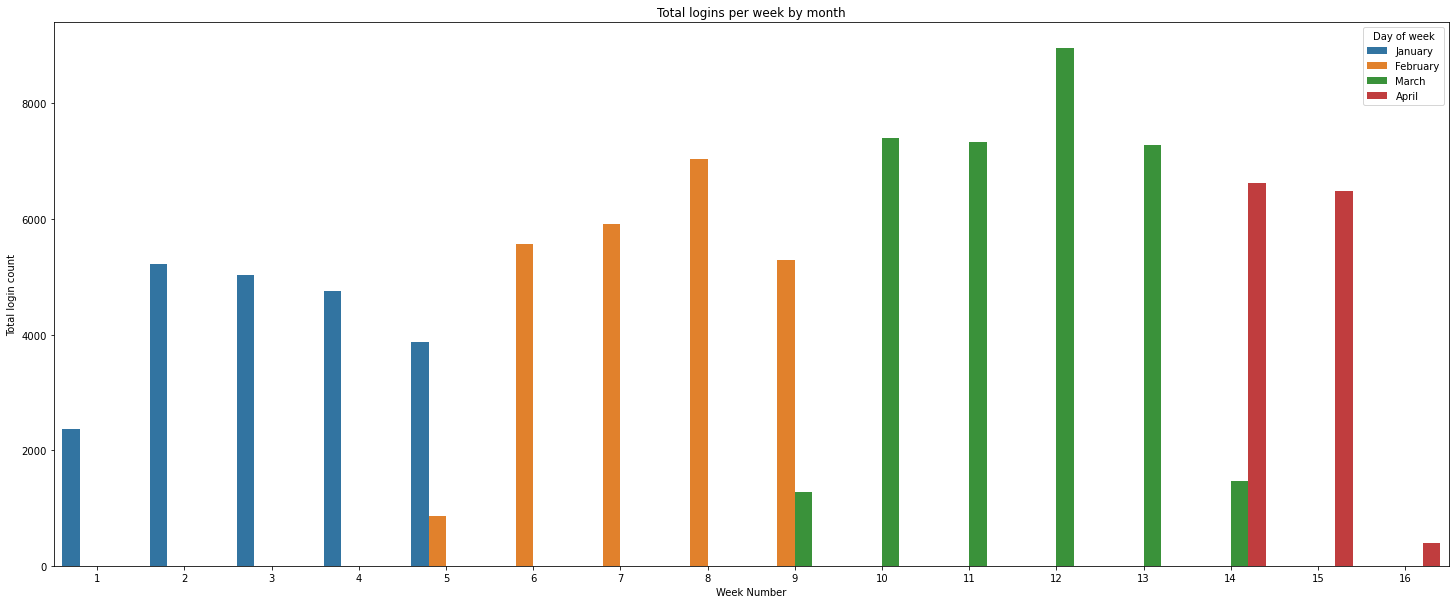

In [319]:
# plot the logins over the 4 moths time period by the week 

fig, ax = plt.subplots(figsize=(25,10))
ax = sns.barplot(x='week', y='login_count', data=weekly_logins_df, hue='month')
ax.legend(title='Day of week' ,loc='upper right')
ax.set(xlabel= 'Week Number', ylabel= 'Total login count', title="Total logins per week by month")

We can see that ridership steadily increases over the 3 moth time window. This could be related to the seasonal shift from winter into spring; weather gets warmer, days get longer and people go out more and become more social. Ridership actually appears to peak right around the time of the daylight savings time shift (clock moving forward) thus having more day light to be active. 

# Pt. 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the observation

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.

# Pt. 2 Response:

1. This is a problem of supply/demand. There is an imbalance of supply/demand in the two cities during their respective busy times. The goal would be to create an equilibrium to even out this imbalance. The primary metric would be: Does a rider's wait time decrease in the busy city and a driver's wait time decrese in the slow city during the experiemnt? Overall we would also expect to see the total ride count increse (when controlled for average ride time/distance).

- There would also be a more broad scope measure: Is revenue minus toll expense greater during experimental times than non-experimentals times? 

2. A) We would need to implement an A/B test, over a long enough period of time to control for random variables that effect supply/demand like special events, weather, and even day of the week. I would rotate every other week meaning 1 week of offering drivers (in the slow city) the reimbursemnt initiative and the next week, not. This could go on for 2-3 months. We would calculate the average wait time in each city during busy hours before and after the experiemnt to compare. Wait time for a rider is pick up time minus request time. Wait time for a driver is request time minus drop off time. 

   B) Our null hypothesis would  be that there won't be a change in wait time for riders in the busy city or drivers in the slow city during the 'on' weeks. With a 95% confidence interval, we would have a P-value of 5% (.05), meaning that if the wait times changed in more than 5% of instances of the experiment, we would reject the null hypothesis and assume our incentive did have an effect. 

   C) Some caveats: A 'change' in wait time isn't necessarily good. We would want to specifically see a *decrease* in wait time during the experimental times. Another potential issue could be if too many drivers accepted the initiative and went to the busy city, creating a surplus of drivers(supply) and not achieving an equilibrium between the cities. If this was the case we could adjust the percentage of drivers that are offered the incentive until a balance is reached. If wait times of riders/drivers decreased in both cities during their respective busy hours, we would expect revenue to increase. If revenue minus the toll expense was higher than the pre-incentive era, the recommendation would be to implement the incentive full time. 



# Pt.3 Modeling 

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [2]:
# import dataset of interest 
users_df = pd.read_json('ultimate_data_challenge.json')


# Basic EDA

In [3]:
users_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
# examine datatypes 

users_df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [5]:
# check for missing values 

users_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [6]:
# examine descriptive stats

users_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Looks like we need to convert some datatypes and address some missing values 

# Munging

In [7]:
# convert 'signup_date' and 'last_trip_date' columns to datetime objecs 

users_df.signup_date = pd.to_datetime(users_df.signup_date)
users_df.last_trip_date = pd.to_datetime(users_df.last_trip_date)

In [8]:
#examine phone column

users_df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

There are two types of phone (iPhone + Andriod) as well as some missing values. We will make a new value for missing phone type called 'unknown'

In [9]:
# lambda function to convert missing phone values to 'unknown' 

users_df['phone'] = users_df.phone.apply(lambda x: 'Unknown' if type(x) != str else x)

Now we need to address the missing values for the two ratings columns. The number of missing ratings is relatively small and will be replaced by the mean value for the respective column. 

<AxesSubplot:>

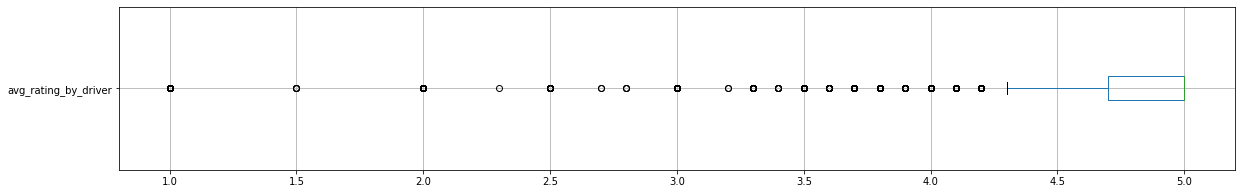

In [10]:
# box plot showing distribution of ratings given to riders by drivers

users_df.boxplot(column='avg_rating_by_driver', figsize=(20,3), vert=False)

<AxesSubplot:>

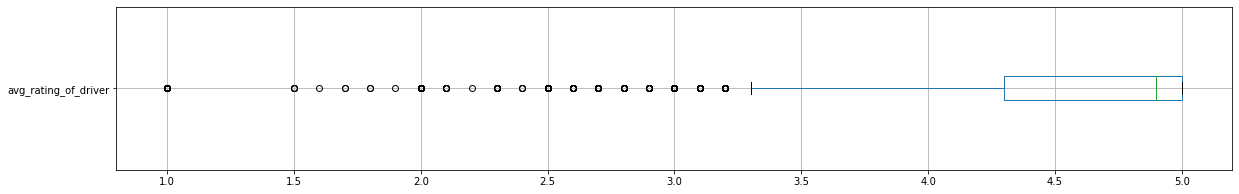

In [11]:
# box plot showing distribution of ratings given to drivers by riders

users_df.boxplot(column='avg_rating_of_driver', figsize=(20,3), vert=False)

The ratings scale is limited to a score between 1-5. This prevents any extreme outlier from skewing our data. 

In [12]:
print(f'The average rating given to a rider by a driver is {users_df.avg_rating_by_driver.mean()}')
print(f'The mdeian rating given to a rider by a driver is {users_df.avg_rating_by_driver.median()}')

print(' ')

print(f'The average rating given to a driver by a rider is {users_df.avg_rating_of_driver.mean()}')
print(f'The median rating given to a driver by a rider is {users_df.avg_rating_of_driver.median()}')


The average rating given to a rider by a driver is 4.778158195947439
The mdeian rating given to a rider by a driver is 5.0
 
The average rating given to a driver by a rider is 4.6015592912744685
The median rating given to a driver by a rider is 4.9


The means and medians for ratings are relatively close, the difference between imputing with mean vs. median is nominal. I will impute missing ratings values with the means. 

In [13]:
# replace missing numeric values with means 

avg_rating1 = users_df.avg_rating_by_driver.mean()
users_df.avg_rating_by_driver = users_df.avg_rating_by_driver.fillna(avg_rating1)

avg_rating2 = users_df.avg_rating_of_driver.mean()
users_df.avg_rating_of_driver = users_df.avg_rating_of_driver.fillna(avg_rating2)

<AxesSubplot:>

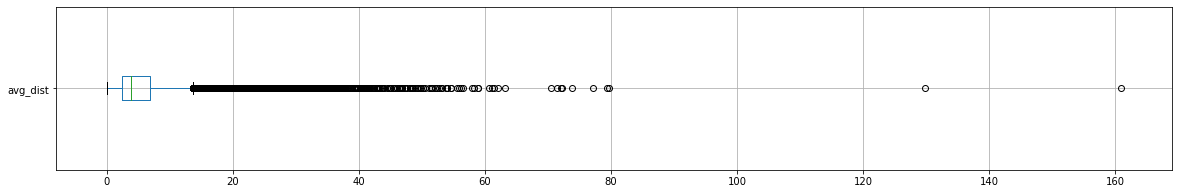

In [295]:
# check for outliers in the 'trips_in_first_30_days' column 

users_df.boxplot(column='avg_dist', figsize=(20,3), vert=False)

In [298]:
users_df[users_df['avg_dist'] > 80]

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,active
534,0.0,2014-01-04,4.601559,1.0,2014-03-09,0.0,0,0.0,129.89,5.000000,0,1,0,0,1,0,0
20701,0.0,2014-01-25,4.601559,1.0,2014-06-26,0.0,0,100.0,160.96,4.778158,1,0,0,1,0,0,1


<AxesSubplot:>

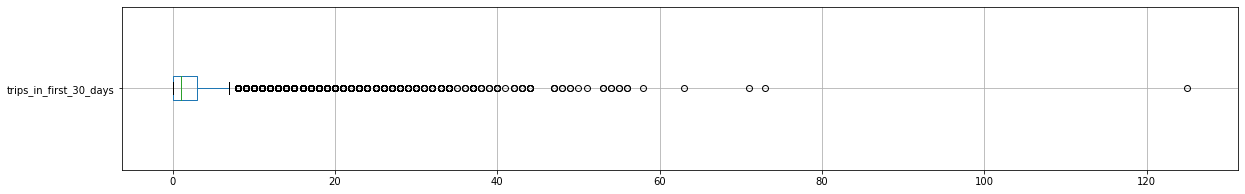

In [14]:
# check for outliers in the 'trips_in_first_30_days' column 

users_df.boxplot(column='trips_in_first_30_days', figsize=(20,3), vert=False)

There's one outlying value of 125 for trips taken in the first month. This seems unlikely. It would be hard to take 125 trips in 30 days. That would be ~4 trips every single day for 30 days. 

In [15]:
# replace outlier with the mean 

mean = users_df['trips_in_first_30_days'].mean()

users_df['trips_in_first_30_days'] = users_df['trips_in_first_30_days'].apply(lambda x: mean if x == 125 else x)

In [16]:
# check to see that we have no missing values 

users_df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

Let's convert the 'ultimate_black_user' column into an binary numeric data type

In [17]:
# lambda function to convert binary bool to int

users_df['ultimate_black_user'] = users_df.ultimate_black_user.apply(lambda x: 1 if x==True else 0)

In [18]:
# examine city column 

users_df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

The 'city' and 'phone' columns are text-based 'object' datatypes, let's make them numeric with a method called 'dummy encoding' 

In [19]:
# dummy encode city column 

users_df = pd.get_dummies(users_df, columns=['city', 'phone'], dtype=int)

In [20]:
#examine updated datatypes

users_df.dtypes

trips_in_first_30_days           float64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
surge_pct                        float64
ultimate_black_user                int64
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
city_Astapor                       int64
city_King's Landing                int64
city_Winterfell                    int64
phone_Android                      int64
phone_Unknown                      int64
phone_iPhone                       int64
dtype: object

Everything is numeric except our dates! 

In [21]:
users_df

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,4.0,2014-01-25,4.700000,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,0,0,1
1,0.0,2014-01-29,5.000000,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0
2,3.0,2014-01-06,4.300000,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,1,0,0,0,0,1
3,9.0,2014-01-10,4.600000,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,0,0,1
4,14.0,2014-01-27,4.400000,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,2014-01-25,5.000000,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,0,0,1
49996,1.0,2014-01-24,4.601559,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,1,0,0,0,0,1
49997,0.0,2014-01-31,5.000000,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,0,0,1,1,0,0
49998,2.0,2014-01-14,3.000000,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,1,0,0,0,0,1


Now, let's add a target varible column: whether or not the rider was 'active'

In [22]:
# view the earliest and lates possible trip dates (the span of our dataset)

users_df.last_trip_date.sort_values(ascending=False)

4486    2014-07-01
43047   2014-07-01
24059   2014-07-01
40290   2014-07-01
28689   2014-07-01
           ...    
23907   2014-01-01
47804   2014-01-01
11578   2014-01-01
11573   2014-01-01
15359   2014-01-01
Name: last_trip_date, Length: 50000, dtype: datetime64[ns]

In [23]:
# add target variable 
# make coumn to represent whether or not a user has been active in the last 30 days (from June 1 to July 1) since the data was pulled

from datetime import timedelta

latest_date = users_df['last_trip_date'].max()

users_df['active'] = users_df['last_trip_date'].apply(lambda x: 1 if (latest_date - x < timedelta(days=31))  else 0)


# More EDA 

In [475]:
# Did everyone sign up during January ?

len(users_df[users_df['signup_date'].dt.month == 1])

# Yes 

50000

In [650]:
# How many people only used the service within the month they signed up (Jan) and took only 1 or 2 trips? 

len(users_df[ (users_df['last_trip_date'].dt.month == 1) & (users_df['trips_in_first_30_days'] < 3) ])

8692

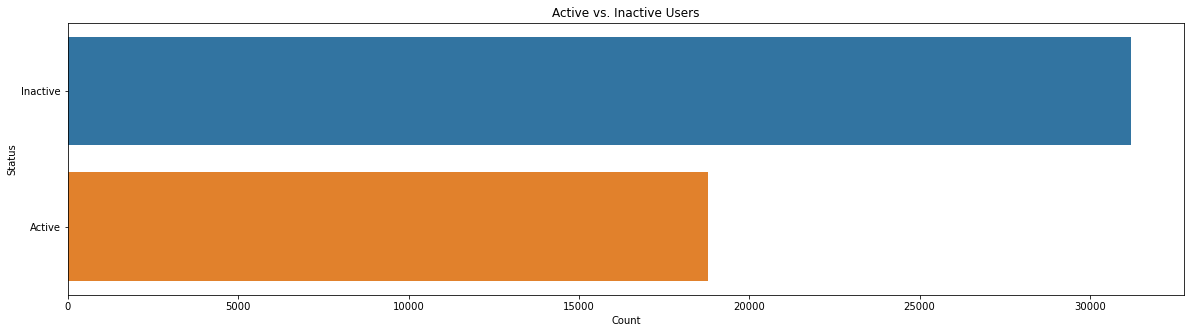

In [1525]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(y='active', data=users_df)
ax.set(xlabel= 'Count', ylabel= 'Status', title="Active vs. Inactive Users")
ax.set_yticklabels(['Inactive', 'Active' ])
        
plt.show()

In [27]:
print(f'There are {len(users_df[users_df["active"]== 1])} active users and {len(users_df[users_df["active"]== 0])} inactive users')

There are 18804 active users and 31196 inactive users


In [28]:
# calculate proportion of users that are active vs inactive 

active = len(users_df[users_df['active'] == 1]) / len(users_df) * 100
inactive = len(users_df[users_df['active'] == 0]) / len(users_df) * 100

print(f'{round(active, 2)} % of all users are active')
print(f'{round(inactive, 2)} % of all users are inactive')

37.61 % of all users are active
62.39 % of all users are inactive


<AxesSubplot:>

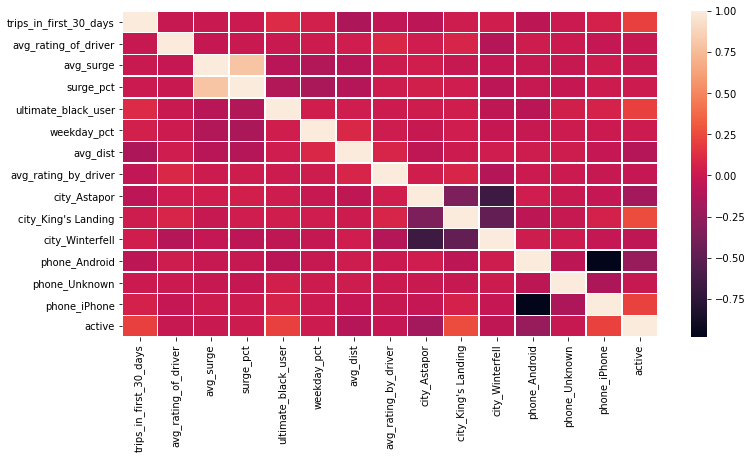

In [29]:
# explore some possible correlations 

fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(users_df.corr(), linewidths=.5, ax=ax)

In [474]:
# examine descriptive stats for ONLY active users

actives_df = users_df[users_df['active'] == 1]
actives_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,active
count,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.000000,18804.0
mean,3.299791,4.593679,1.073809,9.152797,0.505052,61.389034,5.114788,4.762801,0.224846,0.338385,0.436769,0.167305,0.007073,0.825622,1.0
std,4.907139,0.518319,0.163170,15.588704,0.499988,29.487584,4.615175,0.328175,0.417492,0.473173,0.495999,0.373258,0.083805,0.379444,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,4.400000,1.000000,0.000000,0.000000,44.400000,2.560000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,2.000000,4.700000,1.000000,0.000000,1.000000,64.300000,3.730000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,4.000000,5.000000,1.090000,13.300000,1.000000,84.600000,5.890000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0
max,71.000000,5.000000,4.500000,100.000000,1.000000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [471]:
# examine descriptive stats for ONLY inactive users

inactives_df= users_df[users_df['active'] == 0]
inactives_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,active
count,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.000000,31196.0
mean,1.658482,4.606309,1.075339,8.666739,0.299942,60.647032,6.207939,4.787415,0.394474,0.120753,0.484774,0.380690,0.008431,0.610880,0.0
std,2.654222,0.591282,0.251361,22.179139,0.458240,40.982688,6.238675,0.503312,0.488745,0.325845,0.499776,0.485564,0.091432,0.487559,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,4.500000,1.000000,0.000000,0.000000,16.700000,2.320000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,4.800000,1.000000,0.000000,0.000000,69.600000,4.030000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,2.000000,5.000000,1.000000,0.000000,1.000000,100.000000,7.800000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.0
max,73.000000,5.000000,8.000000,100.000000,1.000000,100.000000,129.890000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [630]:
#filter dataset to show only users who took 0 trips in the first 30 days

df_numeric[ df_numeric['trips_in_first_30_days'] == 0 ]


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,active
1,0.0,5.000000,1.00,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0,0
13,0.0,4.000000,1.38,50.0,0,50.0,3.04,5.0,0,1,0,0,0,1,1
17,0.0,3.900000,1.00,0.0,1,95.2,2.38,4.8,0,1,0,0,0,1,1
19,0.0,5.000000,1.17,33.3,0,66.7,12.08,5.0,0,1,0,0,0,1,1
22,0.0,4.601559,1.00,0.0,0,100.0,11.47,5.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,0.0,4.000000,1.00,0.0,0,100.0,0.52,5.0,0,0,1,1,0,0,0
49991,0.0,5.000000,1.25,100.0,0,0.0,1.06,5.0,0,0,1,0,0,1,1
49995,0.0,5.000000,1.00,0.0,0,100.0,5.63,4.2,0,1,0,0,0,1,1
49997,0.0,5.000000,1.00,0.0,1,100.0,3.86,5.0,0,0,1,1,0,0,0


Potential data discrepancy: 

The description of the dataset says that 'avg_dist' is the average distance per trip taken in the first 30 days. So if the amount of trips taken in the first 30 days is 0, then the average distance should also be 0. We can see in the data set above that's not the case. 

Either the description in the prompt is wrong and 'avg_dist' is calculated over the whole 6 month period or the data has quality issues and one of those two columns (avg_dist & trips_in_first_30_days) contains faulty data. 



# Preprocessing

In [402]:
# drop date columns, resulting in a numeric dataset 

df_numeric = users_df.copy()
df_numeric.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [853]:
# import preprocessing library and train-test-split function

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [665]:
# break off the dependent 'target' variable from the independent 'predictor' varibales 

X_independents = df_numeric.drop(['active'], axis=1)
y_target = df_numeric.active


In [742]:
# train/test split the data 

X_train, X_test, y_train, y_test = train_test_split(X_independents, y_target, test_size=.20, random_state=22)

# Modeling with Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [832]:
# instantiate model
lr = LogisticRegression()

# create pipeline
pipeline = Pipeline([('scaler', StandardScaler()),('lr', lr)])

In [848]:
# set up parameters to search and compare
param_grid = {"lr__C" : [0.001, 0.01, 0.1, 0.5, 1, 1.5, 3, 5, 7, 10, 50],
             "lr__penalty" : ['l2', 'none'], 
             "lr__solver" : ['saga', 'lbfgs', 'newton-cg'], 
             "lr__class_weight": [None, 'balanced']}

# create grid search - cross-validation object 
gs_final = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, scoring='accuracy')

# fit training data
gs_final.fit(X_train,y_train)
print("best parameters: ",gs_final.best_params_)


best parameters:  {'lr__C': 0.01, 'lr__class_weight': None, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}


In [1509]:
# predict class for X
y_pred = gs_final.best_estimator_.predict(X_test)


# create function that prints evaluation scores
def evaluate(y__test, y__pred):
    ac = accuracy_score(y__test, y__pred)
    f1 = f1_score(y__test, y__pred, average='weighted')
    pr = precision_score(y__test, y__pred, average='macro')
    re = recall_score(y__test, y__pred, average='macro')

    print('Accuracy Score = %.3f' % (ac))
    print('F1 Score = %.3f' % (f1))
    print("Precision = {}".format(round(pr, 3)))
    print("Recall = {}".format(round(re, 3)))


# generate accuracy and f1 scores
evaluate(y_test, y_pred)

Accuracy Score = 0.720
F1 Score = 0.708
Precision = 0.707
Recall = 0.675


In [915]:
# access and rank the coefficients for our independent variables 

pipe_steps = gs_final.best_estimator_.named_steps['lr']
df_coef = pd.DataFrame(zip(list(df_numeric.columns[:-1]),pipe_steps.coef_[0]),index=range(df_numeric.columns[:-1].shape[0]),columns=['feature','coefficient'])
df_coef.sort_values(by='coefficient', ascending=False)

,feature,coefficient
0,trips_in_first_30_days,0.436350
9,city_King's Landing,0.420875
4,ultimate_black_user,0.415432
13,phone_iPhone,0.244505
3,surge_pct,0.073307
5,weekday_pct,-0.003475
12,phone_Unknown,-0.006133
2,avg_surge,-0.026249
1,avg_rating_of_driver,-0.041792
10,city_Winterfell,-0.057572


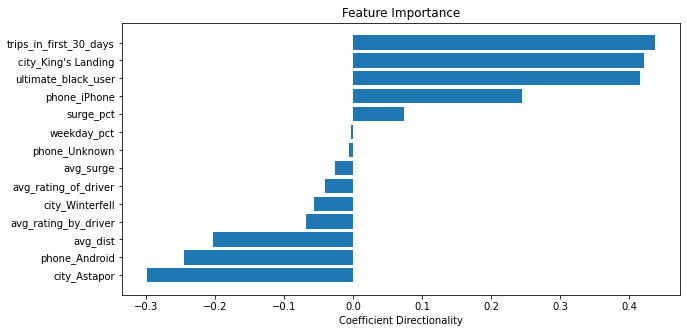

In [1452]:
# plot feature importance scores, ordered by importance

scores_ = np.array(pipe_steps.coef_[0])
sorted_idx = np.argsort(scores_)

# make plots 
pos = np.arange(sorted_idx.shape[0])
sorted_idx.size
plt.figure(figsize=(10,5))
plt.barh(pos, scores_[sorted_idx], align='center')
plt.yticks(pos, df_numeric.columns[sorted_idx])
plt.xlabel('Coefficient Directionality')
plt.title('Feature Importance')
plt.show()

In [652]:
# import Bayesian Optimization tool for hyperparameter tuning 

from bayes_opt import BayesianOptimization

# Modeling with Random Forest Classifier 

In [1502]:
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X_independents, y_target, test_size=.30, random_state=22)

In [382]:
# import the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

In [1503]:
# instantiate model
rfc = RandomForestClassifier()

# create pipeline
pipeline = Pipeline([('scaler', StandardScaler()),('rfc', rfc)])

In [1511]:
# Hyperparameter tuning with Grid Search

params = {'rfc__bootstrap': [True, False],
        'rfc__max_depth': [10, 15, 20, 25],
        'rfc__max_features': ['auto', 'sqrt'],
        'rfc__min_samples_leaf': [3, 5, 7, 9],
        'rfc__min_samples_split': [1, 2, 5, 10],
        'rfc__n_estimators': [25, 50, 75, 100]}

rfc_gscv = GridSearchCV(pipeline, params, cv=5, verbose=True, n_jobs=-1, scoring='accuracy')

rfc_gscv.fit(X_train, y_train)

print("best parameters: ",rfc_gscv.best_params_)
print(f'Training accuracy score from tuned model: {rfc_gscv.best_score_*100:.1f}%')

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
best parameters:  {'rfc__bootstrap': True, 'rfc__max_depth': 15, 'rfc__max_features': 'auto', 'rfc__min_samples_leaf': 5, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 100}
Training accuracy score from tuned model: 78.5%


In [1526]:
# evaluate predictions from Grid Search tuning 

# predict class for X
y_pred = rfc_gscv.predict(X_test)

# generate accuracy and f1 scores
evaluate(y_test, y_pred)

Accuracy Score = 0.789
F1 Score = 0.785
Precision = 0.78
Recall = 0.762


In [1516]:
# Hyperparameter tuning with Random Search 

params = {'rfc__bootstrap': [True, False],
        'rfc__max_depth': [10, 15, 20, 25, 30],
        'rfc__max_features': ['auto', 'sqrt'],
        'rfc__min_samples_leaf': [1, 2, 4],
        'rfc__min_samples_split': [2, 5, 10],
        'rfc__n_estimators': [25, 50, 75, 100, 150]}

rfc_rscv = RandomizedSearchCV(pipeline, param_distributions=params, cv=5, verbose=True, random_state=13)

rfc_rscv.fit(X_train2, y_train2)

print(f'Best parameters: {rfc_rscv.best_params_}')
print(f'Training accuracy score from tuned model: {rfc_rscv.best_score_*100:.1f}%')
print('')

# predict class for X
y_pred = rfc_rscv.predict(X_test2)

# generate accuracy scores
evaluate(y_test2, y_pred)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'rfc__n_estimators': 100, 'rfc__min_samples_split': 2, 'rfc__min_samples_leaf': 4, 'rfc__max_features': 'sqrt', 'rfc__max_depth': 15, 'rfc__bootstrap': True}
Training accuracy score from tuned model: 78.1%

Accuracy Score = 0.790
F1 Score = 0.787
Precision = 0.781
Recall = 0.763


With the optimal hyperparameters we achieve an accuracy score of 79%  

In [1469]:
# create function for evaluating and plotting feature importance

def feature_metrics(model_object, pipe_model_name, title, perm=False):

    # generate permutation feature importance if desired (perm=True)
    if perm == True:
        perm_imp = permutation_importance(model_object, X_train, y_train, n_repeats=10, random_state=22)
        mean_imp = [v for k,v in perm_imp.items() if k == 'importances_mean']
        feature_importance = mean_imp[0]

    # generate GINI importance metric
    else:
        feature_importance = model_object.best_estimator_.named_steps[pipe_model_name].feature_importances_

    # create list of feature name and importance score 
    rounded_feat = [round(x,2) for x in feature_importance]
    feat_imp = list(zip(df_numeric.columns[:-1],rounded_feat))

    # print list of features and their importance as a proportion of the total importance
    print('Features and their proportional importance:')
    for i in feat_imp:
        print(i[0], '=', int(i[1]*100), '%')
    
    # make plots
    sorted_idx = np.argsort(feature_importance) 
    pos = np.arange(sorted_idx.shape[0]) 
    sorted_idx.size
    plt.figure(figsize=(15,5))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df_numeric.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title(title)
    plt.show()

Features and their proportional importance:
trips_in_first_30_days = 7 %
avg_rating_of_driver = 5 %
avg_surge = 10 %
surge_pct = 12 %
ultimate_black_user = 5 %
weekday_pct = 13 %
avg_dist = 10 %
avg_rating_by_driver = 15 %
city_Astapor = 3 %
city_King's Landing = 10 %
city_Winterfell = 2 %
phone_Android = 3 %
phone_Unknown = 0 %
phone_iPhone = 4 %


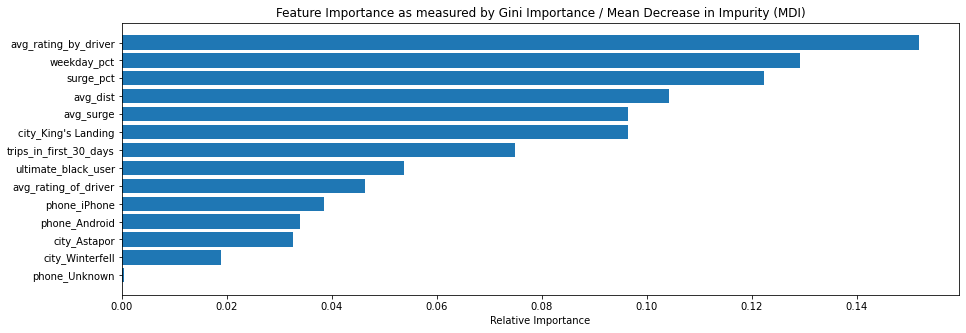

In [1500]:
feature_metrics(rfc_gscv, 'rfc', 'Feature Importance as measured by Gini Importance / Mean Decrease in Impurity (MDI)')

Features and their proportional importance:
trips_in_first_30_days = 3 %
avg_rating_of_driver = 2 %
avg_surge = 2 %
surge_pct = 2 %
ultimate_black_user = 3 %
weekday_pct = 5 %
avg_dist = 2 %
avg_rating_by_driver = 5 %
city_Astapor = 1 %
city_King's Landing = 4 %
city_Winterfell = 1 %
phone_Android = 1 %
phone_Unknown = 0 %
phone_iPhone = 1 %


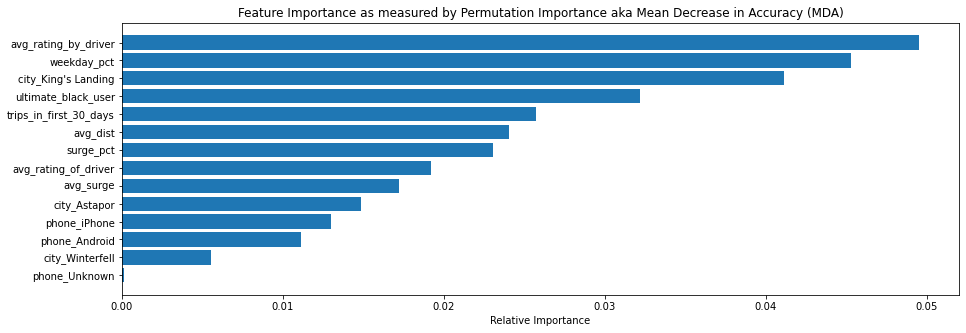

In [1501]:
feature_metrics(rfc_gscv, 'rfc', 'Feature Importance as measured by Permutation Importance aka Mean Decrease in Accuracy (MDA)', perm=True)

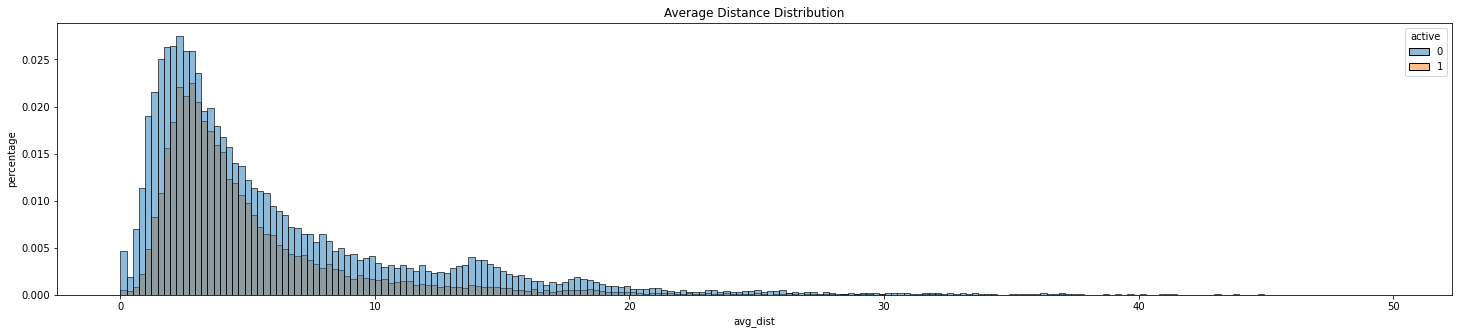

In [1517]:
# plot the 'average distance' distrubution of our dataset to see if we can spot a correltaion 

df = df_numeric[df_numeric['avg_dist'] <= 50 ]


fig, ax = plt.subplots(figsize=(25,5))
ax = sns.histplot(x='avg_dist', data=df, hue='active', stat = 'probability')
ax.set(xlabel= 'avg_dist', ylabel= 'percentage', title='Average Distance Distribution')
plt.show()

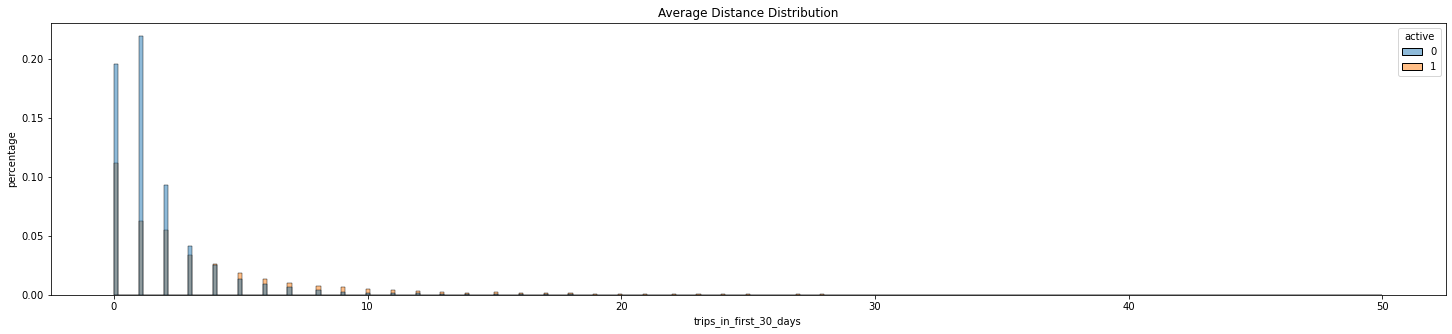

In [1486]:
df = df_numeric[df_numeric['trips_in_first_30_days'] <= 50 ]


fig, ax = plt.subplots(figsize=(25,5))
ax = sns.histplot(x='trips_in_first_30_days', data=df, hue='active', stat = 'probability')
ax.set(xlabel= 'trips_in_first_30_days', ylabel= 'percentage', title='Average Distance Distribution')
plt.show()

# Modeling with Gradient Boosting 

In [576]:
import xgboost as xgb

XGBoost in SKLearn pipeline

In [1495]:
boost_pipe = Pipeline([('scaler', StandardScaler()), ('xgclass', xgb.XGBClassifier())])

In [1496]:
# pipline with Grid Search

parameters = {
     "xgclass__eta"    : [0.10, 0.15, 0.20, 0.25] ,
     "xgclass__max_depth"        : [ 4, 5, 6, 8],
     "xgclass__min_child_weight" : [ 1, 3, 5, 7 ],
     "xgclass__gamma"            : [ 0.1, 0.2 , 0.3, 0.4 ],
     "xgclass__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
  }

boost_gscv = GridSearchCV(boost_pipe, parameters, cv=5, verbose=True, n_jobs=-1, scoring='accuracy')

boost_gscv.fit(X_train, y_train)

print("best parameters: ", boost_gscv.best_params_)
print(f'Training accuracy score from tuned model: {boost_gscv.best_score_*100:.1f}%')

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
best parameters:  {'xgclass__colsample_bytree': 0.4, 'xgclass__eta': 0.2, 'xgclass__gamma': 0.2, 'xgclass__max_depth': 6, 'xgclass__min_child_weight': 1}
Training accuracy score from tuned model: 79.1%


In [1497]:
# predict class for X
y_pred = boost_gscv.predict(X_test)

# generate accuracy scores
evaluate(y_test, y_pred)

Accuracy Score = 0.795
F1 Score = 0.792
Precision = 0.786
Recall = 0.77


In [1518]:
# pipeline with Random Search

parameters = {
     "xgclass__eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "xgclass__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "xgclass__min_child_weight" : [ 1, 3, 5, 7 ],
     "xgclass__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "xgclass__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "xgclass__learning_rate": [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
  }

boost_rscv = RandomizedSearchCV(boost_pipe,
                    parameters, n_jobs=4,
                    scoring="accuracy",
                    cv=5)

boost_rscv.fit(X_train, y_train)

print("Best parameters:", boost_rscv.best_params_)
print("Best Score:", boost_rscv.best_score_)

Best parameters: {'xgclass__min_child_weight': 1, 'xgclass__max_depth': 5, 'xgclass__learning_rate': 0.3, 'xgclass__gamma': 0.3, 'xgclass__eta': 0.2, 'xgclass__colsample_bytree': 0.3}
Best Score: 0.7886


In [1520]:
# predict class for X
y_pred = boost_rscv.predict(X_test)

# generate accuracy scores
evaluate(y_test, y_pred)

Accuracy Score = 0.808
F1 Score = 0.805
Precision = 0.801
Recall = 0.783


Features and their proportional importance:
trips_in_first_30_days = 2 %
avg_rating_of_driver = 1 %
avg_surge = 5 %
surge_pct = 1 %
ultimate_black_user = 20 %
weekday_pct = 9 %
avg_dist = 0 %
avg_rating_by_driver = 7 %
city_Astapor = 5 %
city_King's Landing = 20 %
city_Winterfell = 5 %
phone_Android = 12 %
phone_Unknown = 0 %
phone_iPhone = 2 %


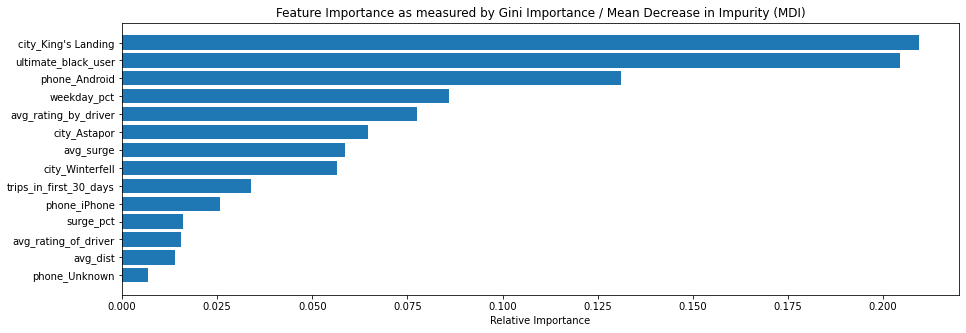

In [1521]:
feature_metrics(boost_gscv, 'xgclass', 'Feature Importance as measured by Gini Importance / Mean Decrease in Impurity (MDI)')

Features and their proportional importance:
trips_in_first_30_days = 3 %
avg_rating_of_driver = 1 %
avg_surge = 3 %
surge_pct = 2 %
ultimate_black_user = 2 %
weekday_pct = 5 %
avg_dist = 2 %
avg_rating_by_driver = 3 %
city_Astapor = 1 %
city_King's Landing = 3 %
city_Winterfell = 0 %
phone_Android = 1 %
phone_Unknown = 0 %
phone_iPhone = 0 %


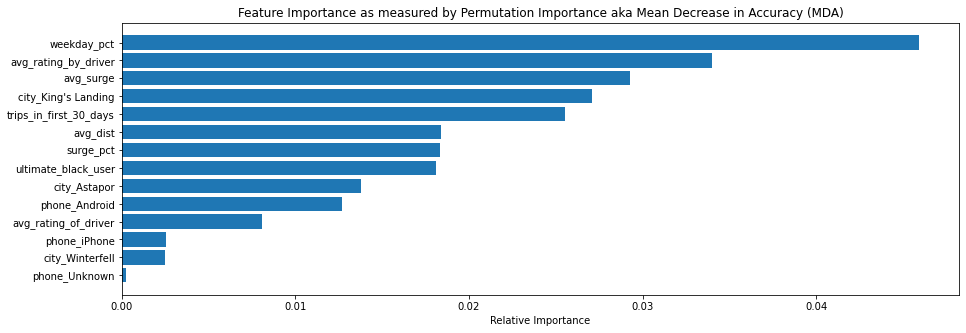

In [1499]:
feature_metrics(boost_gscv, 'xgclass', 'Feature Importance as measured by Permutation Importance aka Mean Decrease in Accuracy (MDA)', perm=True)

Suspiciously low for avg_dist, but some intuitive metrics based on EDA. Want to investigate XGB further. 

## Try XGBoost with native '.train()' method. as opposed to Sk learn .fit()

In [1024]:
# scale the data 

scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [1205]:
# create DMatrix format
D_train = xgb.DMatrix(X_train_scaled, label=y_train)
D_test = xgb.DMatrix(X_test_scaled, label= y_test)

Accuracy Score = 0.795
F1 Score = 0.791
Precision = 0.786
Recall = 0.769


<Figure size 1152x864 with 0 Axes>

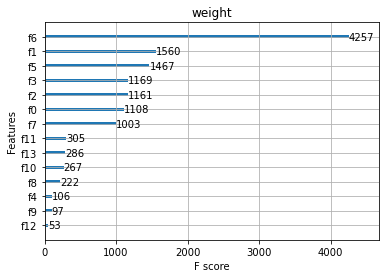

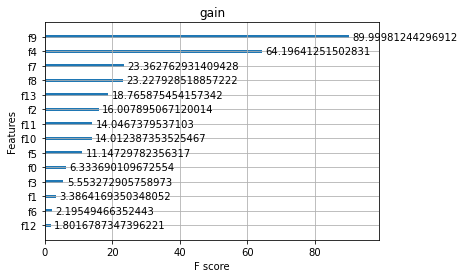

In [1404]:
# employ best parameters from previous random search

parameters = {'min_child_weight': 1, 
            'gamma': 0.3, 
            'colsample_bytree': 0.5, 
            'eta': 0.1, 
            'max_depth': 8,  
            'objective': 'multi:softprob',  
            'num_class': 9}

steps = 40

model = xgb.train(parameters, D_train, steps)

preds = model.predict(D_test)

best_preds = np.asarray([np.argmax(line) for line in preds])

#print accuracy scores 
evaluate(y_test, best_preds)

# plot feature importance 
plt.figure(figsize=(16, 12))
xgb.plot_importance(model, importance_type='weight')
plt.title('weight')
xgb.plot_importance(model, importance_type='gain')
plt.title('gain')
plt.show()


In [1480]:
df_numeric.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_Unknown', 'phone_iPhone',
       'active'],
      dtype='object')

In [1438]:
# calculate feature importance score 

imp_dict = model.get_score(importance_type='gain')

14


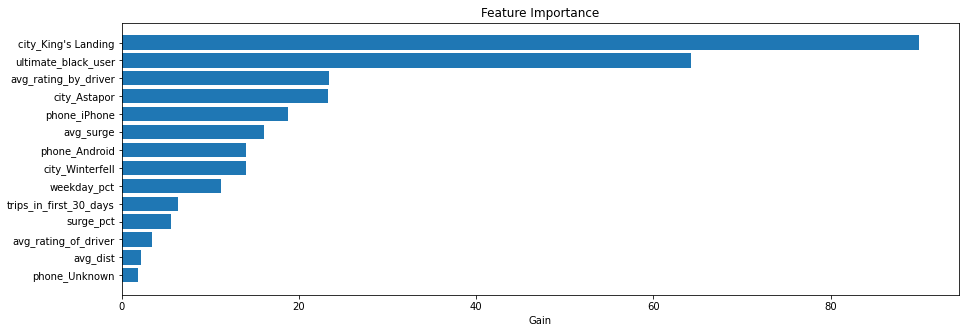

In [1522]:
# wrangling the output (dictionary) of model.get_score() into a list ordered by columns in dataframe 

# turn dictionary into list of tuples
results = [(k, v) for k,v in imp_dict.items()]

# unpack tuples into long list
features_ = []
results.sort()
for i in results:
    features_ += i

# get rid of the 'f' at the beginning of the feature number
for ind, i in enumerate(features_):
    if type(i) == str:
        features_[ind] = i[1:] 

# convert feature number from a string to a float, so they cam be numerically sorted        
for i in range(0, len(features_)):
    features_[i] = float(features_[i])

# repack long list back into list of feature/value pairs (as tuples)
it = iter(features_)
score_tup = list(zip(it, it))

# sort list of tuples by feature number, which will then correlate to the columns in our dataframe 
score_tup.sort()

# create list of importance scores ONLY, but still ordered by features in df 
gain_scores = []
for i in score_tup:
    gain_scores.append(i[1])


# plot feature importance scores, ordered by importance
scores_ = np.array(gain_scores)
sorted_idx = np.argsort(scores_)

# make plots 
pos = np.arange(sorted_idx.shape[0])
print(pos.size)
sorted_idx.size
plt.figure(figsize=(15,5))
plt.barh(pos, scores_[sorted_idx], align='center')
plt.yticks(pos, df_numeric.columns[sorted_idx])
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

In [ ]:
# let's use the SHAP library to evaluate feature importance 

import shap

In [1527]:
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")

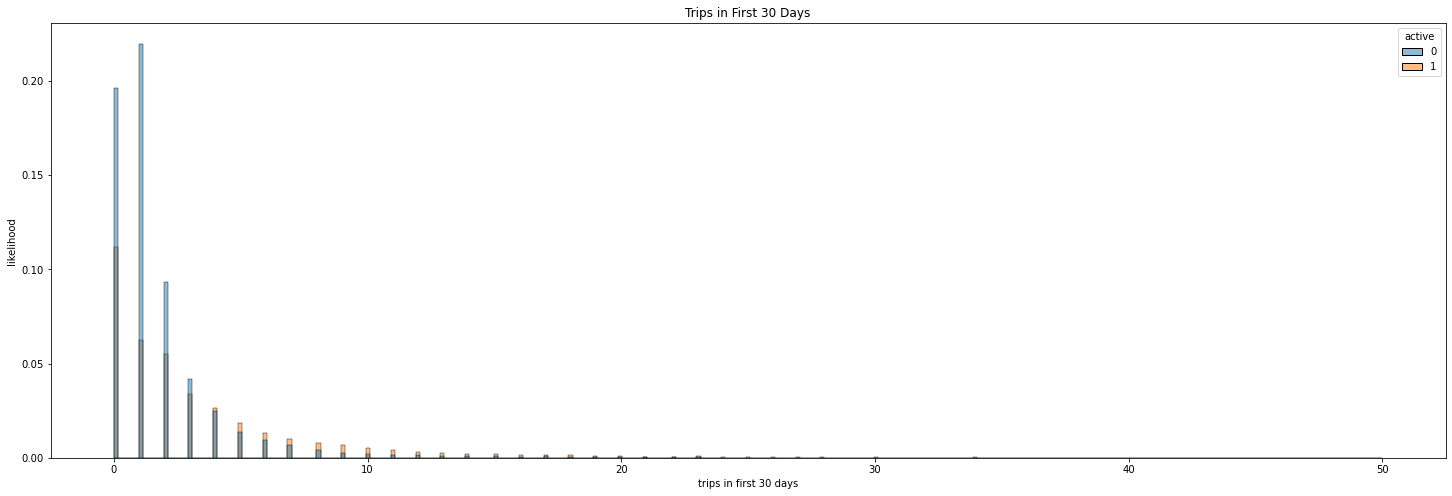

In [1523]:
df = df_numeric[df_numeric['trips_in_first_30_days'] <= 50]


fig, ax = plt.subplots(figsize=(25,8))
ax = sns.histplot(x='trips_in_first_30_days', data=df, hue='active', stat = 'probability')
ax.set(xlabel= 'trips in first 30 days', ylabel= 'likelihood', title='Trips in First 30 Days')
plt.show()

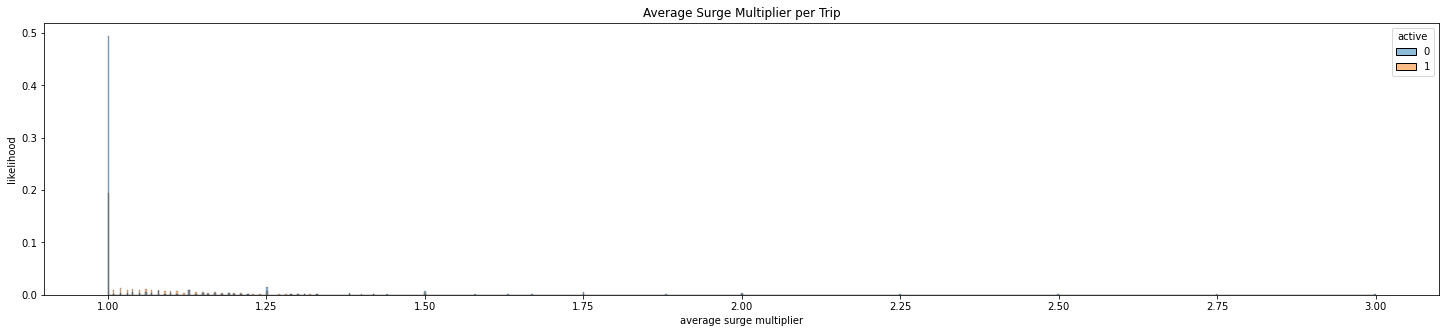

In [1524]:
df = df_numeric[df_numeric['avg_surge'] <= 3]


fig, ax = plt.subplots(figsize=(25,5))
ax = sns.histplot(x='avg_surge', data=df, hue='active', stat = 'probability')
ax.set(xlabel= 'average surge multiplier', ylabel= 'likelihood', title='Average Surge Multiplier per Trip')
plt.show()

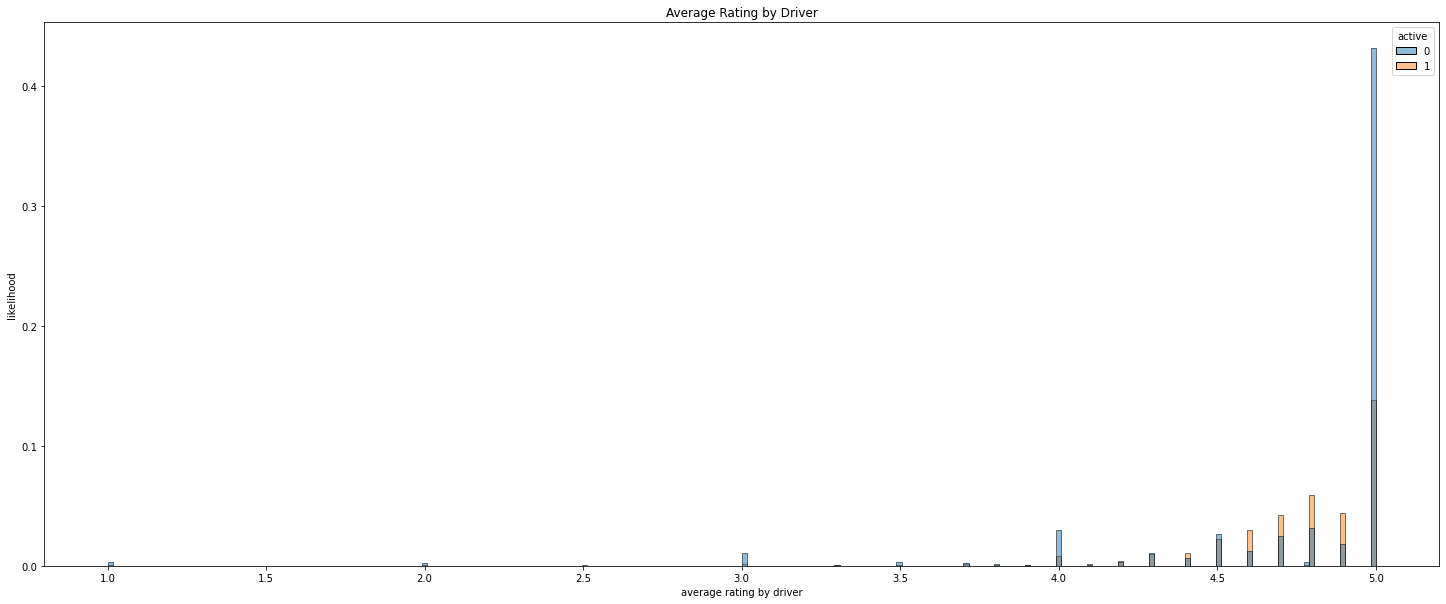

In [535]:


fig, ax = plt.subplots(figsize=(25,10))
ax = sns.histplot(x='avg_rating_by_driver', data=df_numeric, hue='active', stat = 'probability')
ax.set(xlabel= 'average rating by driver', ylabel= 'likelihood', title='Average Rating by Driver')
plt.show()

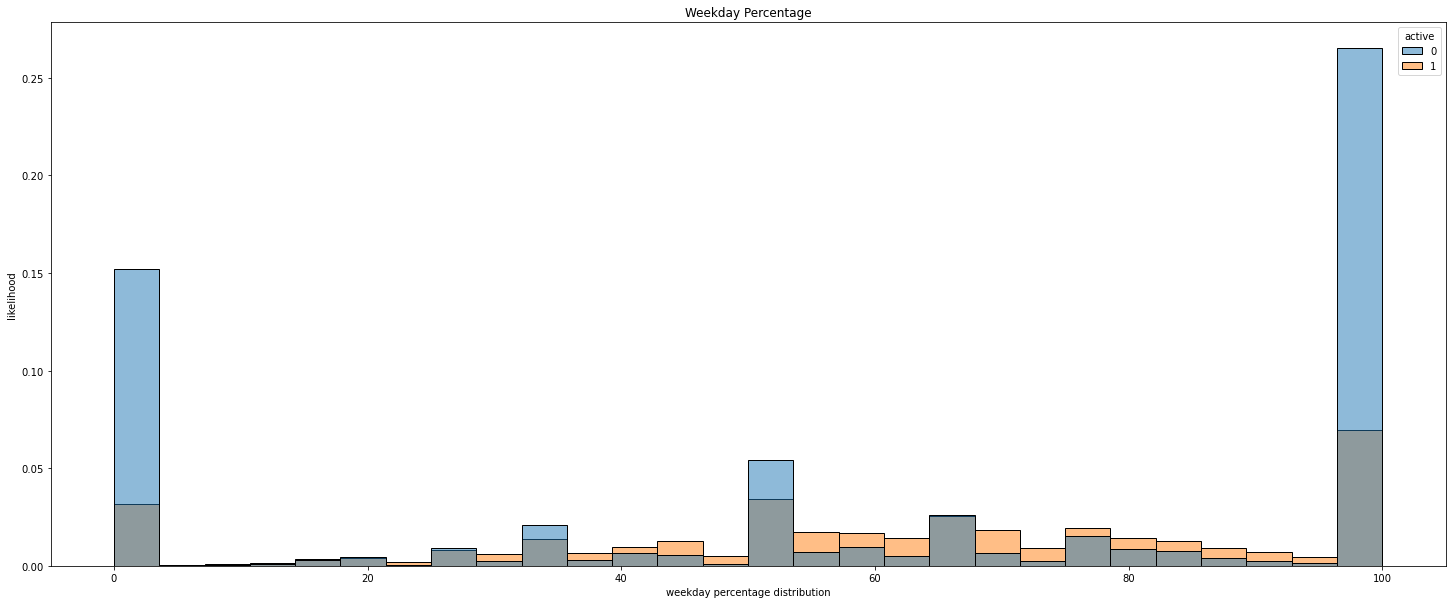

In [530]:

fig, ax = plt.subplots(figsize=(25,10))
ax = sns.histplot(x='weekday_pct', data=df_numeric, hue='active', stat = 'probability')
ax.set(xlabel= 'weekday percentage distribution', ylabel= 'likelihood', title='Weekday Percentage')
plt.show()

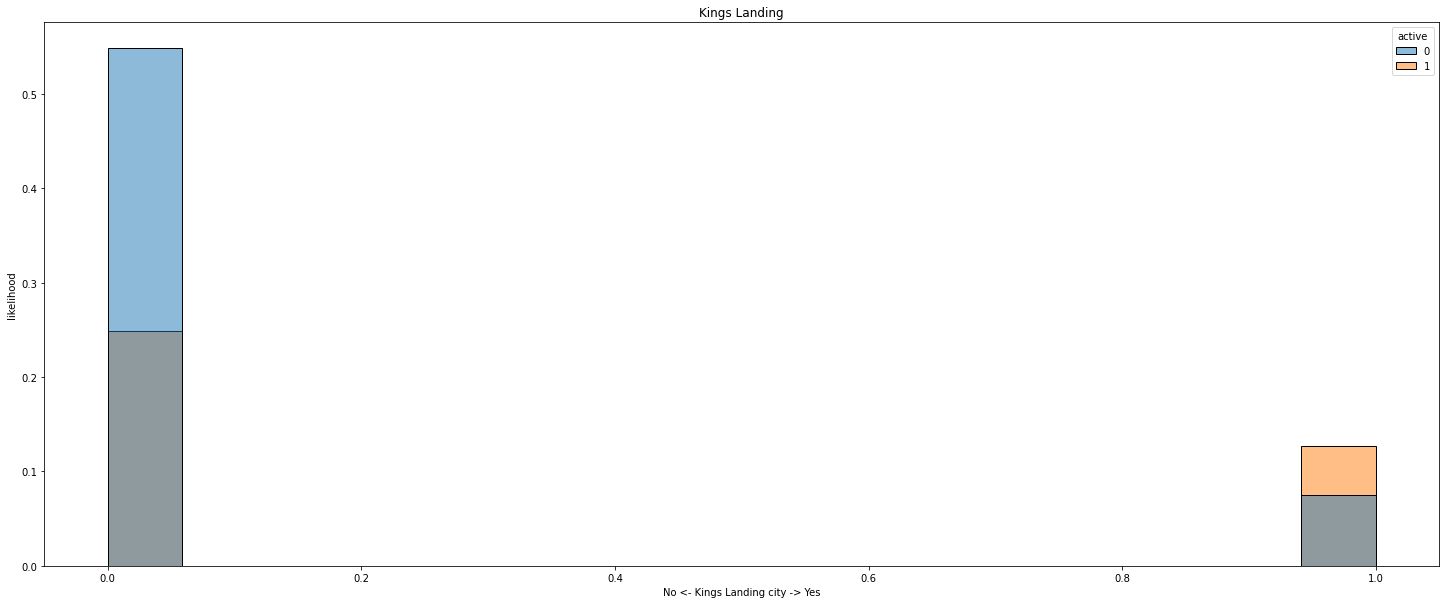

In [598]:

fig, ax = plt.subplots(figsize=(25,10))
ax = sns.histplot(x="city_King's Landing", data=df_numeric, hue='active', stat = 'probability')
ax.set(xlabel= 'No <- Kings Landing city -> Yes', ylabel= 'likelihood', title='Kings Landing')
plt.show()